In [23]:
# File imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Import settings
plt.style.use('ggplot')

In [24]:
# Download the market data
data = yf.download('^GSPC', period='max', interval='1d', auto_adjust=True)['Close']

# Calculate the returns
daily_returns = data['^GSPC'].pct_change().dropna()
monthly_returns = data['^GSPC'].resample('ME').last().pct_change().dropna() # Month end
yearly_returns = data['^GSPC'].resample('YE').last().pct_change().dropna()  # Year end

returns = {
    'Daily' : daily_returns,
    'Monthly' : monthly_returns,
    'Yearly' : yearly_returns
}

[*********************100%***********************]  1 of 1 completed


### Return Distributions
Given daily, monthly, and annual returns for the S&P 500 we focus on the distribution and summary statistics for each sampling period. This section only considers the _full-period_ summary. 

Daily Returns:
Positive Returns(%): 52.4142 | Negative Returns(%): 47.5858
count    24459.000000
mean         0.000310
std          0.011956
min         -0.204669
25%         -0.004550
50%          0.000494
75%          0.005475
max          0.166096
Name: ^GSPC, dtype: float64
Monthly Returns:
Positive Returns(%): 59.5381 | Negative Returns(%): 40.4619
count    1169.000000
mean        0.006426
std         0.053489
min        -0.299423
25%        -0.019144
50%         0.009364
75%         0.035968
max         0.391376
Name: ^GSPC, dtype: float64
Yearly Returns:
Positive Returns(%): 67.3469 | Negative Returns(%): 32.6531
count    98.000000
mean      0.079432
std       0.189524
min      -0.470665
25%      -0.050598
50%       0.110887
75%       0.227663
max       0.450222
Name: ^GSPC, dtype: float64


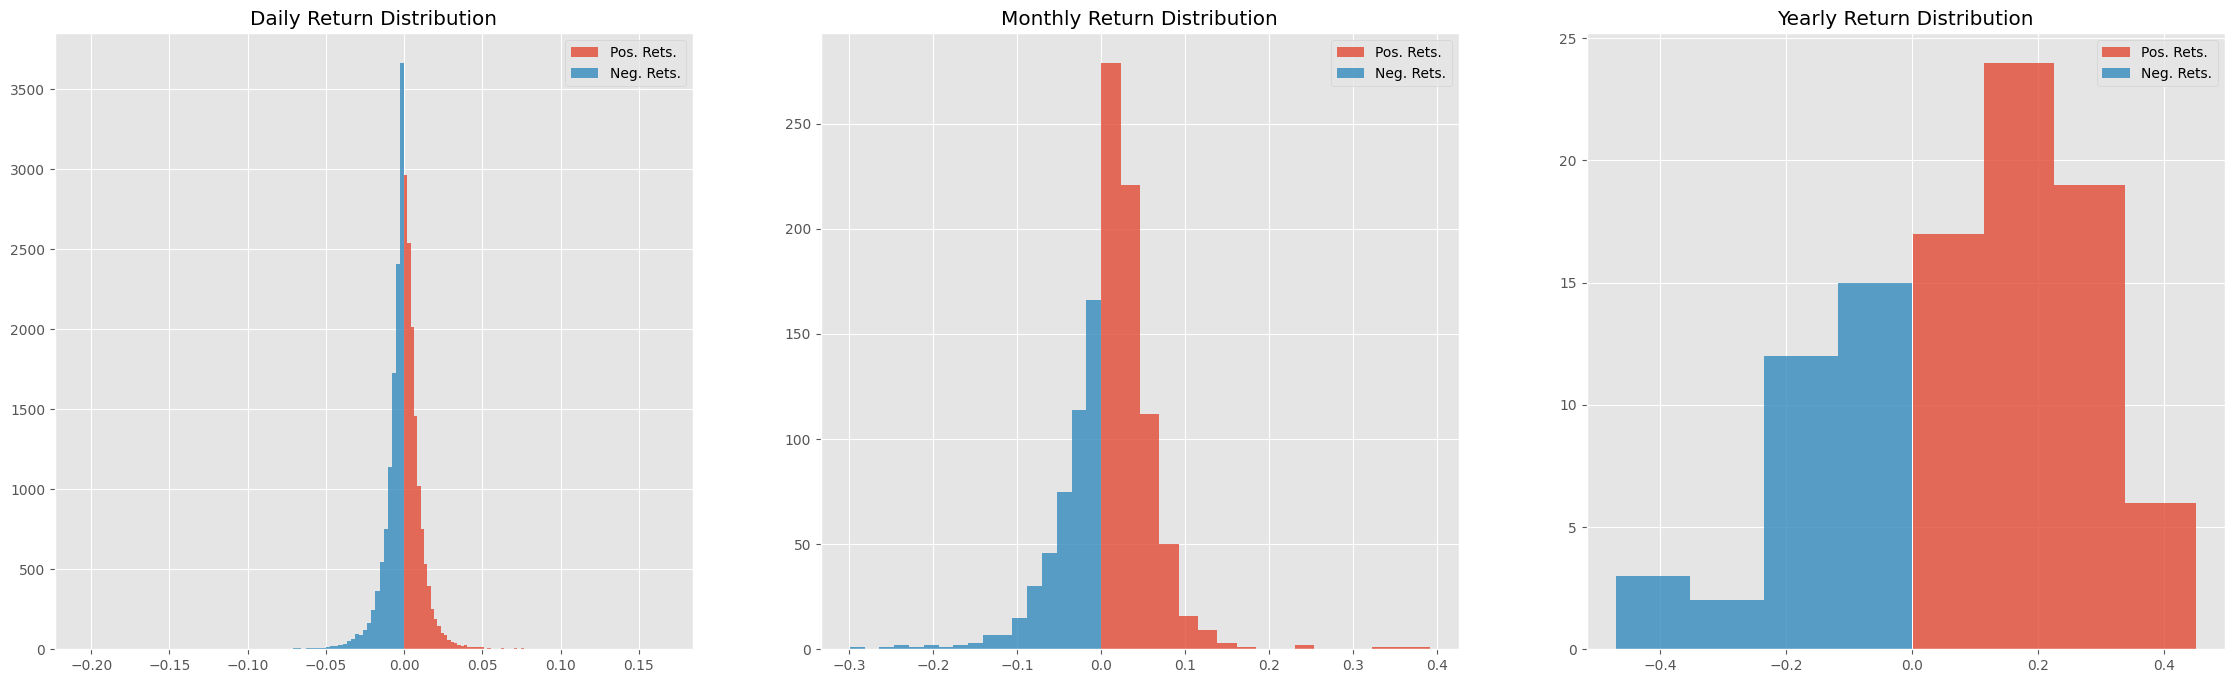

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(28, 8))

# Determine the total % of positive and negative returns for earch periodicity
ncol = 0
for k, v in returns.items():
    pos_returns = v[v > 0]
    neg_returns = v[v <= 0]

    pos_pct = len(pos_returns) / len(v) * 100
    neg_pct = len(neg_returns) / len(v) * 100

    print(f'{k} Returns:')
    print(f'Positive Returns(%): {pos_pct:.4f} | Negative Returns(%): {neg_pct:.4f}')
    print(v.describe())

    bins = int(np.sqrt(len(v)) / 2)

    # Plot the distribution of returns
    axes[ncol].hist(pos_returns, bins=bins, alpha=0.8, label='Pos. Rets.')
    axes[ncol].hist(neg_returns, bins=bins, alpha=0.8, label='Neg. Rets.')
    axes[ncol].set_title(f'{k} Return Distribution')
    axes[ncol].legend()

    ncol += 1

# Display the plot
plt.show()

Observed above, all periods have a larger percentage of positive returns compared to negative returns (which makes intuitive sense). Given that the price of the S&P 500 has advanced since 1928, we would expect a larger number of positive returns. The more intersting observation is that as the time period increases, the percentage of positive returns also increases. One reason for this could be the association between time and smaller measurement intervals. EXPLAIN THE "COMPOUNDING EFFECT".

(Daily) Minimum Positive %: 37.3016
(Daily) Maximum Positive %: 63.0952


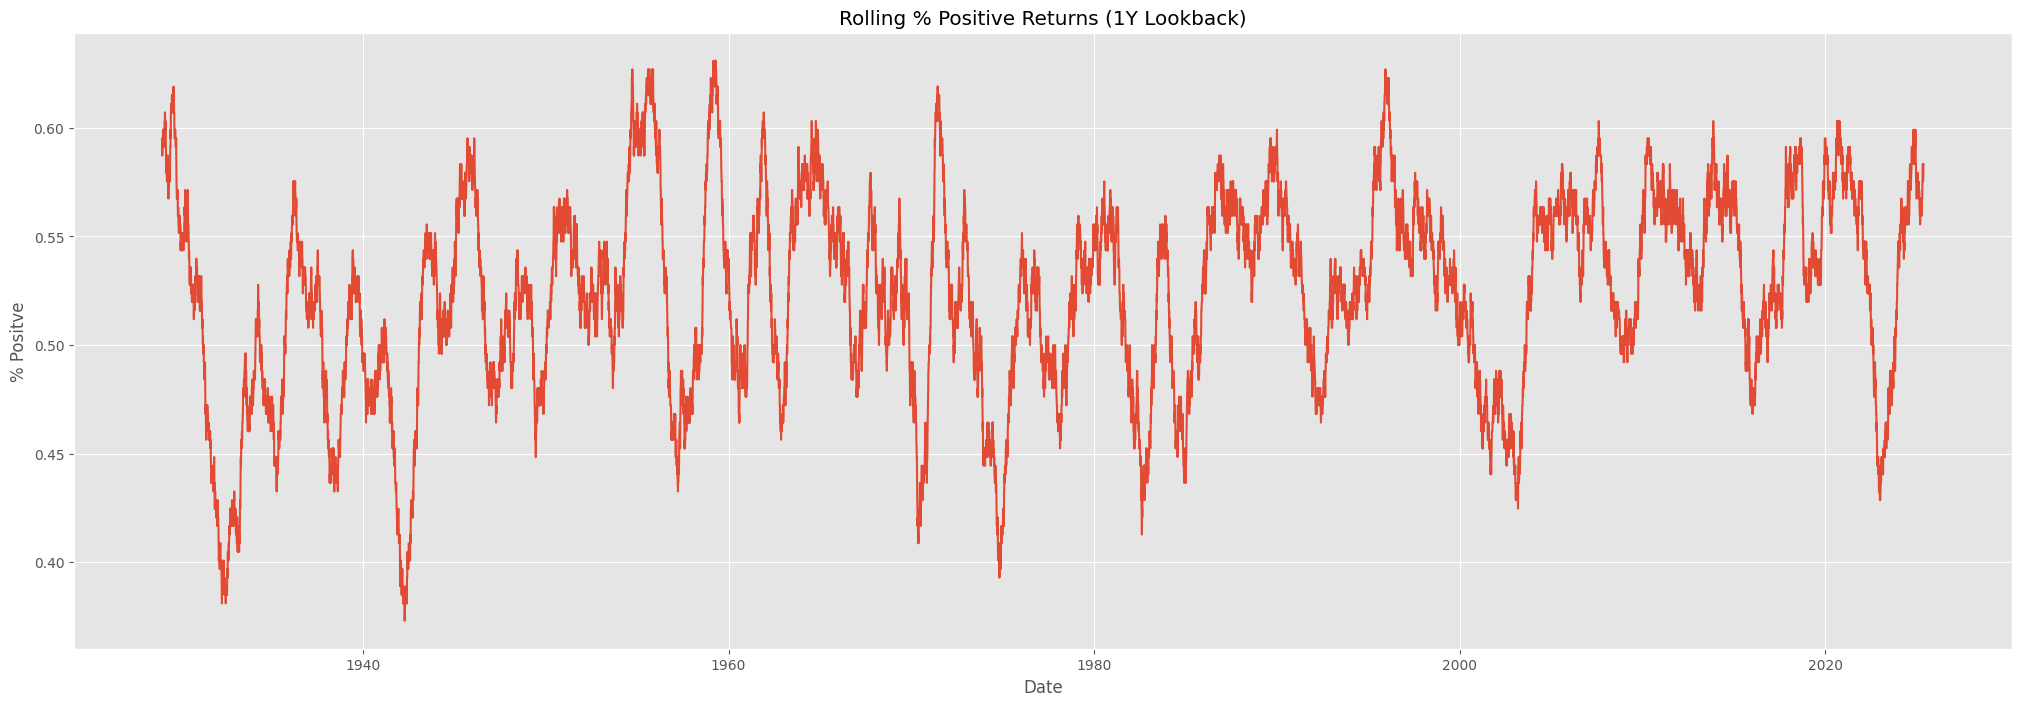

In [26]:
# Calculate the percentage of positive daily returns over a 1-year lookback period
# NOTE: This is on a rolling basis

DAILY_LOOKBACK = 252

# Identify positive (1) and negative (0) returns
positive = (returns['Daily'] > 0).astype(int)
pct_positive = positive.rolling(window=DAILY_LOOKBACK).mean()
pct_positive.dropna(inplace=True)

print(f"(Daily) Minimum Positive %: {min(pct_positive)*100:.4f}")
print(f"(Daily) Maximum Positive %: {max(pct_positive)*100:.4f}")

plt.figure(figsize=(25, 8))
plt.plot(pct_positive)
plt.title('Rolling % Positive Returns (1Y Lookback)')
plt.xlabel('Date')
plt.ylabel('% Positve')
plt.show()

Using a 1-year lookback period, the the largest percentage of positive daily returns was 63.10%. The smallest percentage of positive daily returns was 37.30%. On a rolling basis, there is a clear pattern of fluctuation between a higher and lower percentage of positive daily returns over the 1-year lookback.

(Monthly) Minimum Positive %: 8.3333
(Monthly) Maximum Positive %: 100.0000


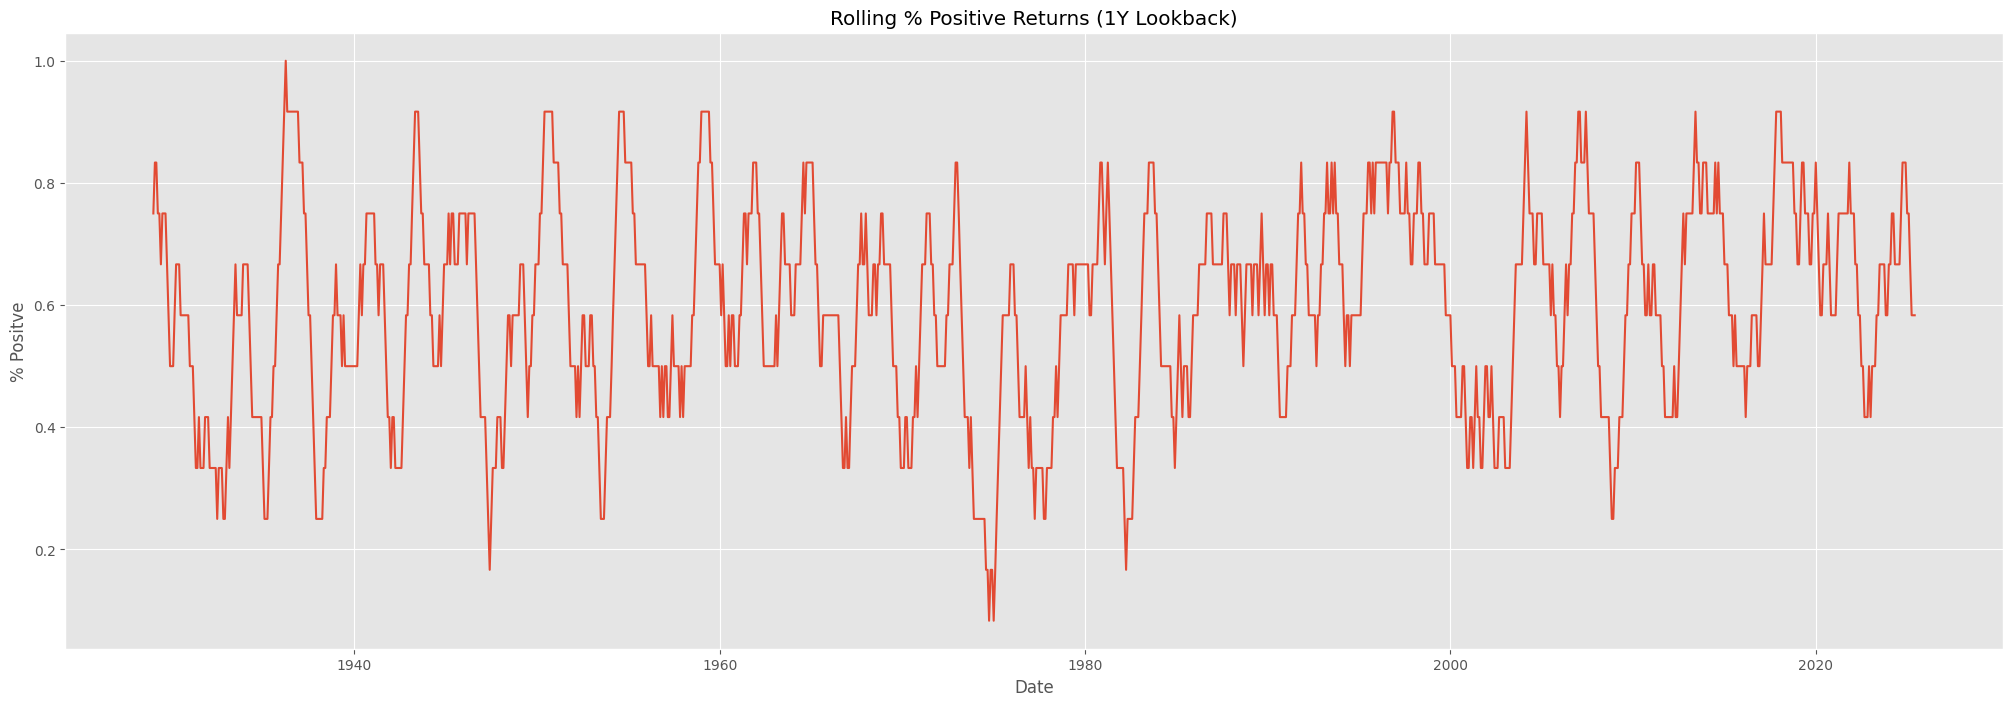

In [27]:
# Calculate the percentage of positive monthly returns over a 1-year lookback period
# NOTE: This is on a rolling basis

MONTHLY_LOOKBACK = 12

# Identify positive (1) and negative (0) returns
positive = (returns['Monthly'] > 0).astype(int)
pct_positive = positive.rolling(window=MONTHLY_LOOKBACK).mean()
pct_positive.dropna(inplace=True)

print(f"(Monthly) Minimum Positive %: {min(pct_positive)*100:.4f}")
print(f"(Monthly) Maximum Positive %: {max(pct_positive)*100:.4f}")

plt.figure(figsize=(25, 8))
plt.plot(pct_positive)
plt.title('Rolling % Positive Returns (1Y Lookback)')
plt.xlabel('Date')
plt.ylabel('% Positve')
plt.show()

Using a 1-year lookback period, the the largest percentage of positive monthly returns was 100%. The smallest percentage of positive monthly returns was 8.33%. On a rolling basis, there is a clear pattern of fluctuation between a higher and lower percentage of positive monthly returns over the 1-year lookback.

#### Conclusion (Return Distributions)
It appears that if the rolling percentage either increases or decreases, there is a possibility that the percentage will revert to the opposite direction. A higher percentage of positive returns suggests that investors have earned a higher or positive return due to compounding. Conversely, a lower percentage of positive returns suggests that investors have earned lower or negative returns. Over the full sample period (1928-2025) the daily, monthly, and annual returns have experienced a greater percentage of positive returns. This makes sense because the absolute return for the S&P 500 is largely positive. More interestingly, as the measurement window increased, the percentage of positive returns also increased.